## Name: Vishal Menon
## Github username: vmeno0020
## USC ID: 3377740336

In [1]:
import numpy as np
import math
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from scipy import stats
from itertools import combinations

## Part b i.

In [2]:
CCPP_df = pd.read_excel('../data/CCPP/Folds5x2_pp.xlsx')
CCPP_df.columns = ['Average Temperature', 'Exhaust Vacuum', 'Ambient Pressure', 'Relative Humidity', 'Energy Output']
print(CCPP_df)

      Average Temperature  Exhaust Vacuum  Ambient Pressure  \
0                   14.96           41.76           1024.07   
1                   25.18           62.96           1020.04   
2                    5.11           39.40           1012.16   
3                   20.86           57.32           1010.24   
4                   10.82           37.50           1009.23   
...                   ...             ...               ...   
9563                16.65           49.69           1014.01   
9564                13.19           39.18           1023.67   
9565                31.32           74.33           1012.92   
9566                24.48           69.45           1013.86   
9567                21.60           62.52           1017.23   

      Relative Humidity  Energy Output  
0                 73.17         463.26  
1                 59.08         444.37  
2                 92.14         488.56  
3                 76.64         446.48  
4                 96.62         473.90

There are 9568 rows and 5 columns. The rows represent the values of the hourly average ambient variables Temperature, Ambient Pressure, Relative Humidity, and Exhaust Vacuum, which predict the last column which is the net hourly electrical energy output. The columns represent the actual features themselves. 

## Part b ii.

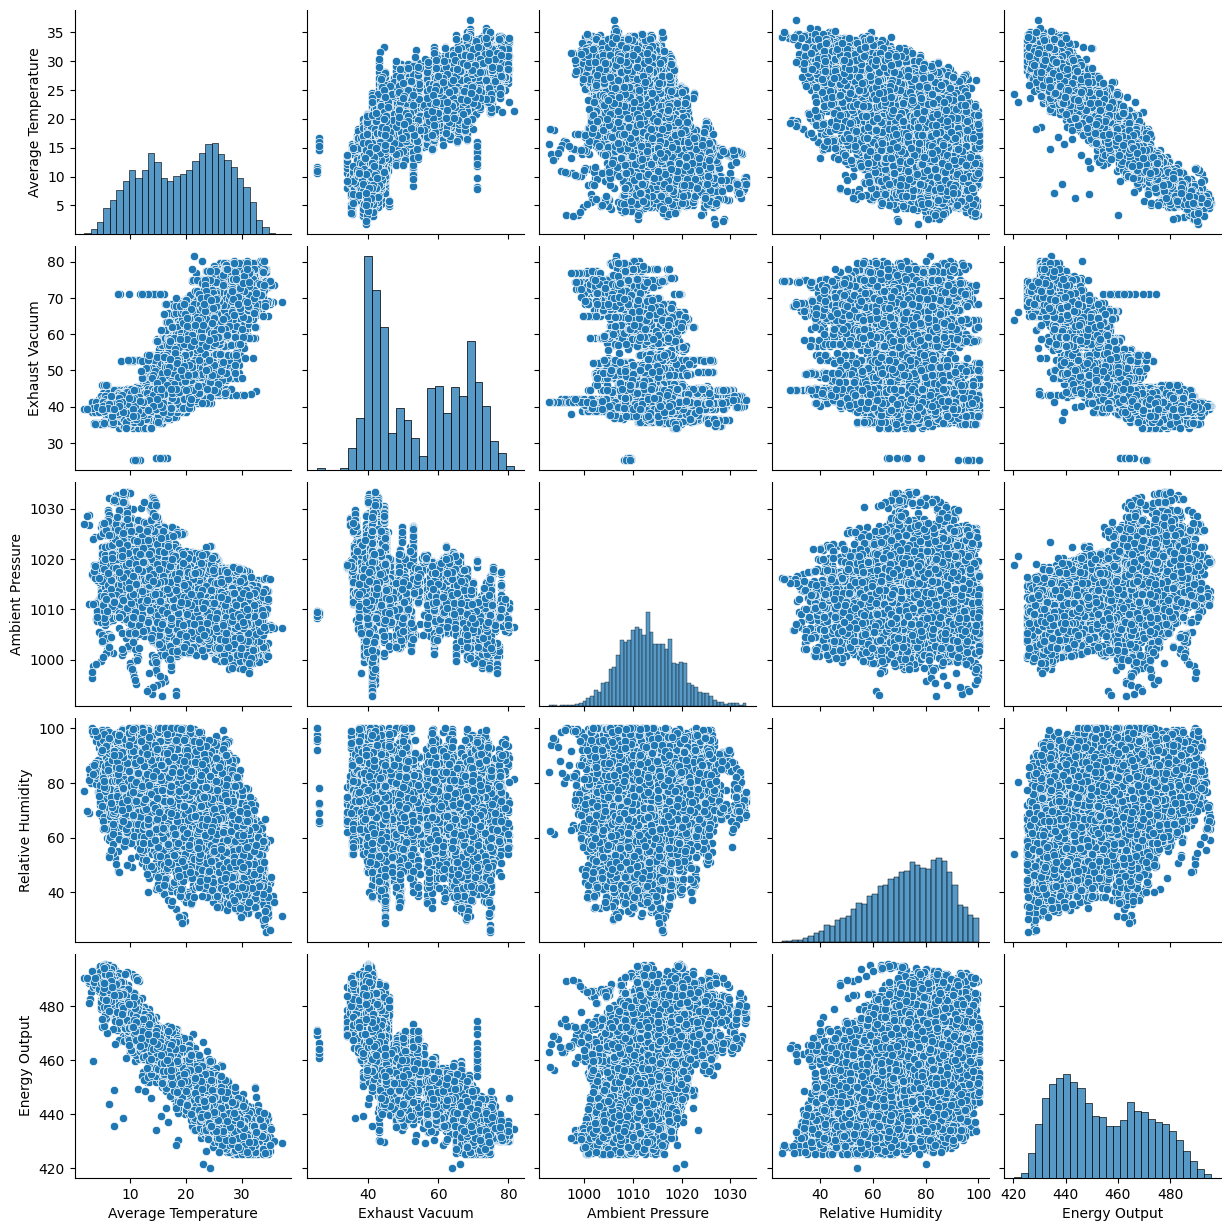

In [3]:
sns.pairplot(data = CCPP_df)
plt.show()

It seems that the variables average temperature and exhaust vacuum have a negative linear relationship with energy output because as the temperature and exhaust increase, the energy output levels decrease. Ambient Pressure and Relative humidity do not appear to have a relationship with energy output but no definite conclusions can be made yet.

## Part b iii.

In [4]:
CCPP_df.describe()

,Average Temperature,Exhaust Vacuum,Ambient Pressure,Relative Humidity,Energy Output
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


## Part c i.

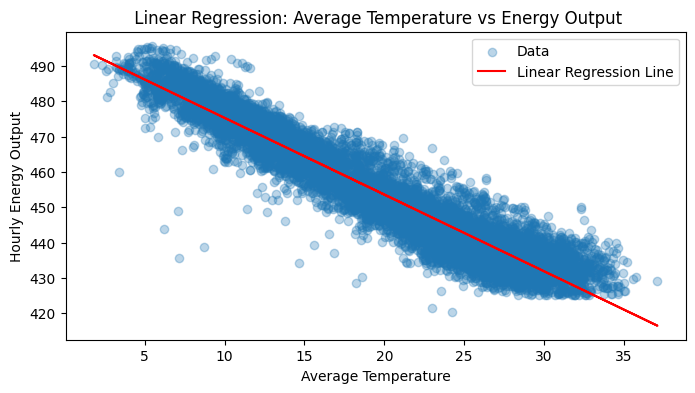

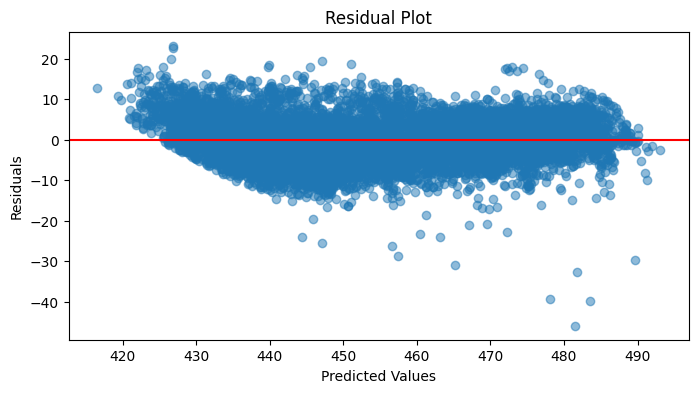

R-squared value:  0.8989475964148236


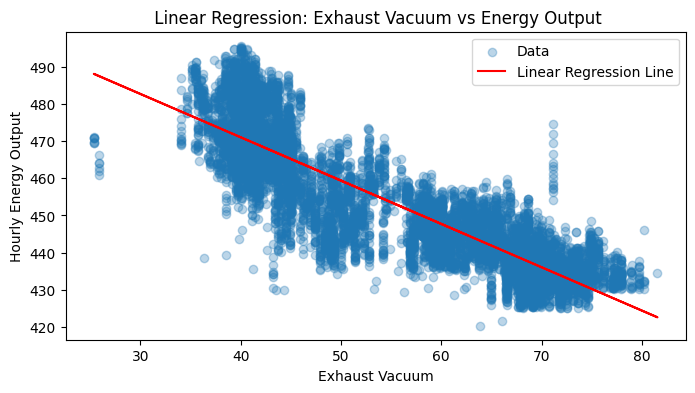

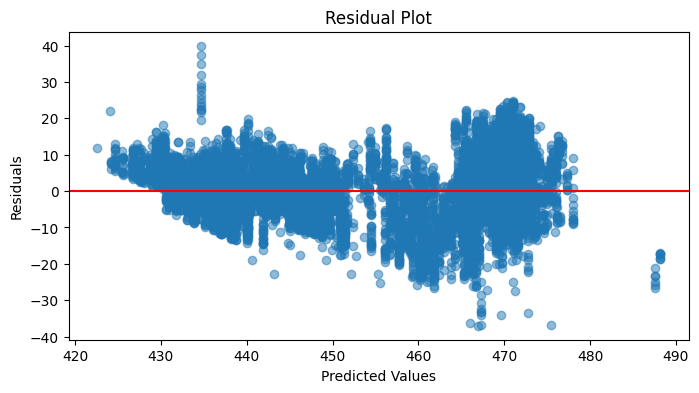

R-squared value:  0.7565177870683979


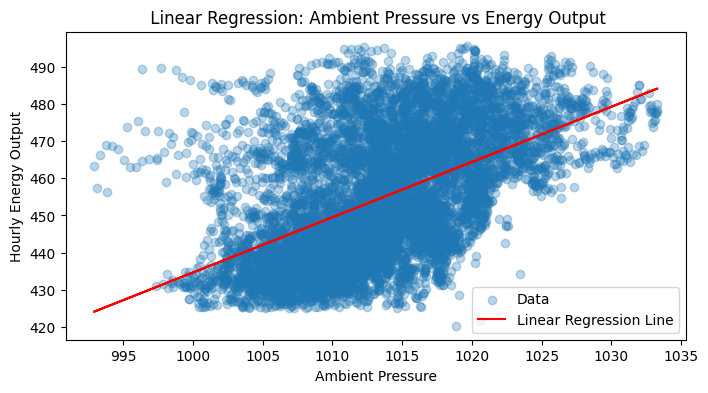

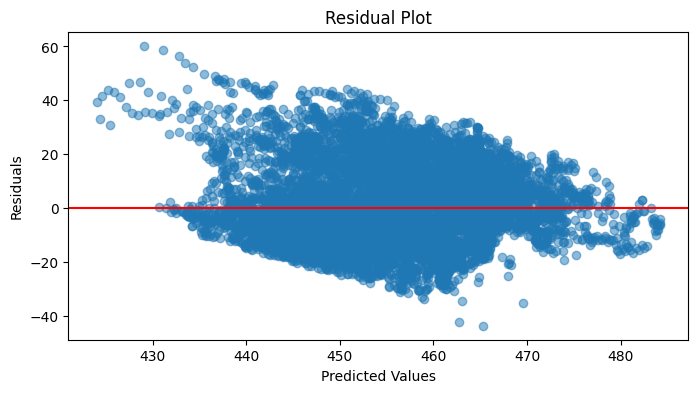

R-squared value:  0.2687686564110672


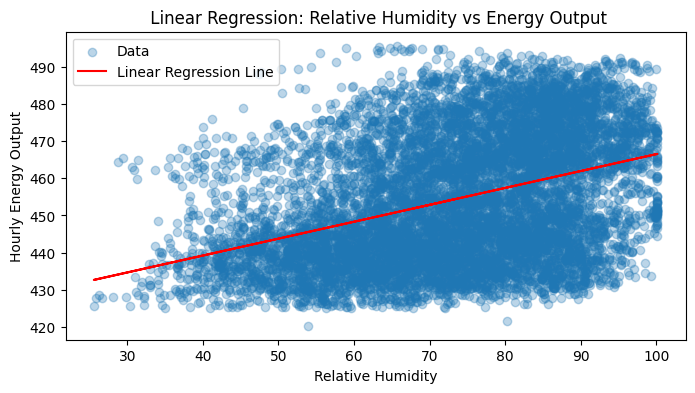

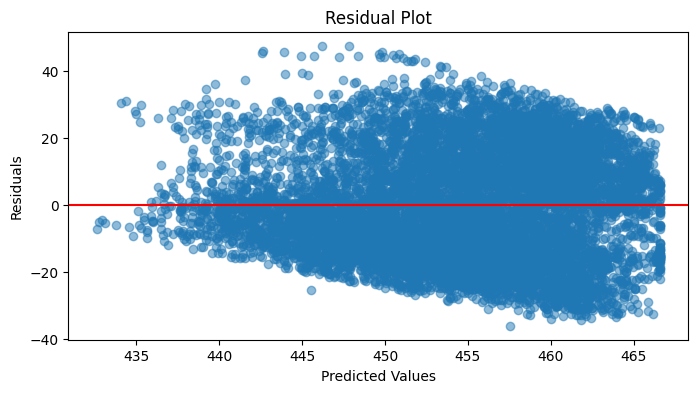

R-squared value:  0.15193944023117578


In [5]:
#providing input and output as arrays; input must be 1 column and as many rows as necessary
x = CCPP_df[['Average Temperature', 'Exhaust Vacuum', 'Ambient Pressure', 'Relative Humidity']]
y = CCPP_df[['Energy Output']]

model = LinearRegression()

# loop over predictors to perform regression and plot
for predictor in x:
    # Reshape data for sklearn
    X = CCPP_df[predictor].values.reshape(-1, 1)
    Y = CCPP_df['Energy Output'].values
    
    # fitting model
    model.fit(X, Y)
    slope = model.coef_[0]
    intercept = model.intercept_
    r_value = model.score(X, Y)  # r^2 value

    #predicted values and residuals
    Y_pred = model.predict(X)
    
    residuals = Y - Y_pred

    
    # Plotting
    plt.figure(figsize=(8, 4))
    plt.scatter(X, Y, alpha=0.3, label='Data')
    plt.plot(X, Y_pred, 'r', label='Linear Regression Line')
    plt.title(f" Linear Regression: {predictor} vs Energy Output")
    plt.xlabel(predictor)
    plt.ylabel('Hourly Energy Output')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(8, 4))
    plt.scatter(Y_pred, residuals, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='-')  # y = 0
    plt.title('Residual Plot')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.show()
    
    print('R-squared value: ', r_value)


The models of average temperature and exhaust vacuum both have high r^2 value indicating a statisticallly significant association between predictor and response. There are a few outliers in the model for Exhaust Vacuum and average temperature (also in the residuals plot) but they don't need to be removed as there are not that many such data points.

## Part D

In [6]:
X = CCPP_df[['Average Temperature', 'Exhaust Vacuum', 'Ambient Pressure', 'Relative Humidity']]
Y = CCPP_df['Energy Output']             

X = sm.add_constant(X) #constant to include an intercept


model = sm.OLS(Y, X).fit() #fit model

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Energy Output   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Mon, 03 Jun 2024   Prob (F-statistic):               0.00
Time:                        18:43:07   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 454.6093    

From the summary output, we can  see all the predictors have p-values less than 0.05 so we can reject the null hypothesis for all 4 predictors. This means there is a statistically significant association with the response variable.

## Part E

In [7]:
predictors_new = ['Average Temperature', 'Exhaust Vacuum', 'Ambient Pressure', 'Relative Humidity']
response = 'Energy Output'


simple_coeffs = {} #store the coefficients in a dictionary

# loop for coefficients for each predictor
for predictor in predictors_new:
    X = CCPP_df[predictor].values.reshape(-1, 1)
    Y = CCPP_df[response].values
    model = LinearRegression().fit(X, Y)
    simple_coeffs[predictor] = model.coef_[0]  # store coefficient of the predictor

In [8]:
X_multi = CCPP_df[predictors_new]#multiple regression model
X_multi = sm.add_constant(X_multi)  #constant as the intercept
model_multi = sm.OLS(CCPP_df[response], X_multi).fit()
multi_coeffs = model_multi.params[1:]  


simple_coeffs_list = [simple_coeffs[key] for key in predictors_new]
multi_coeffs_list = [multi_coeffs[key] for key in predictors_new] #get coefficients into lists

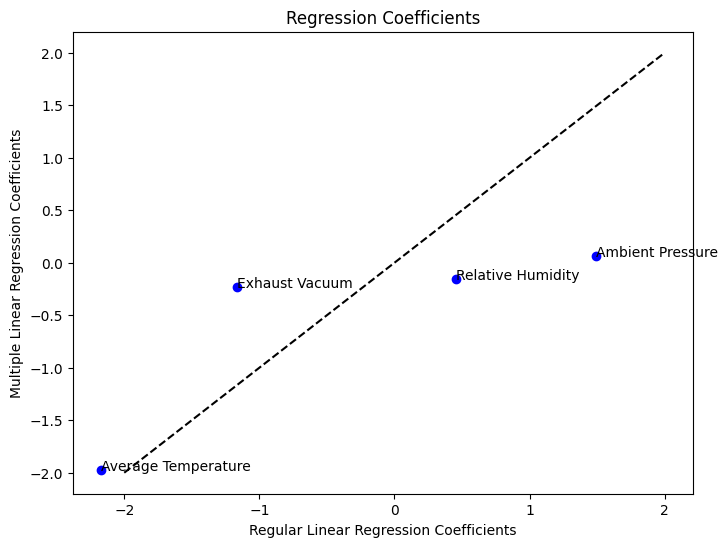

In [9]:

plt.figure(figsize=(8, 6))
plt.scatter(simple_coeffs_list, multi_coeffs_list, color='b') #plot


for i, predictor in enumerate(predictors_new):
    plt.annotate(predictor, (simple_coeffs_list[i], multi_coeffs_list[i])) #put points on plot  

plt.title('Regression Coefficients')
plt.xlabel('Regular Linear Regression Coefficients')
plt.ylabel('Multiple Linear Regression Coefficients')
plt.plot([-2, 2], [-2, 2], 'k--')  # line y=x for reference
plt.show()

For relative humidity the coefficient is positive in simple linear regression but it is neggative in multiple linear regression.

## Part F

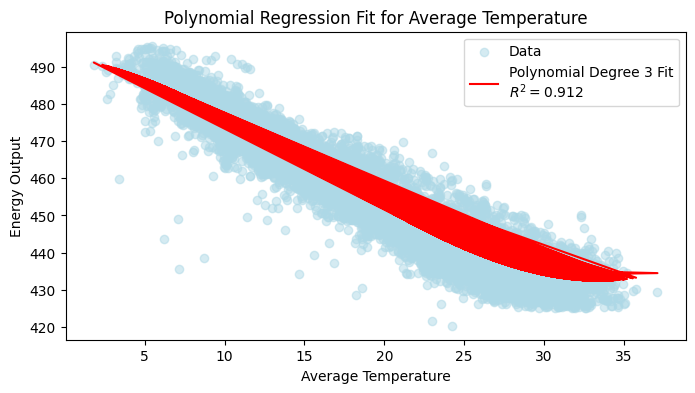

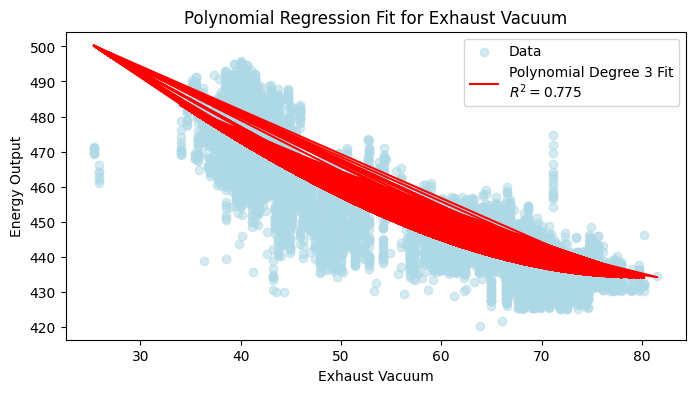

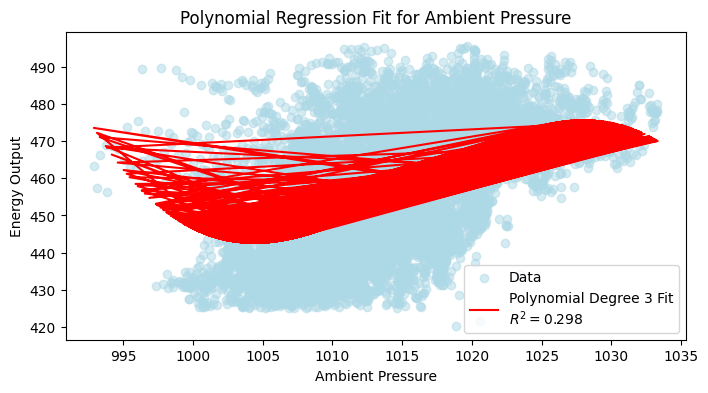

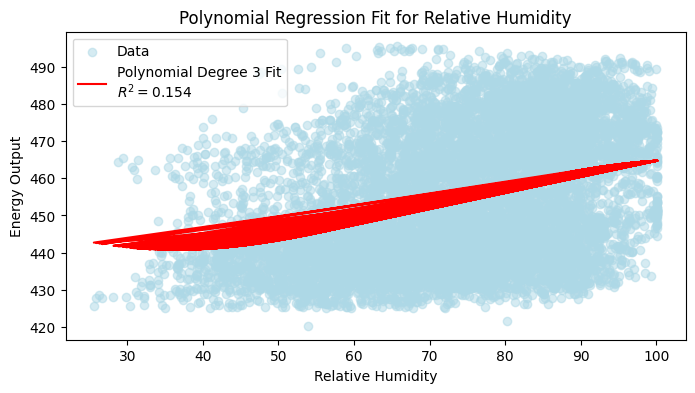

In [10]:
predictors_new = ['Average Temperature', 'Exhaust Vacuum', 'Ambient Pressure', 'Relative Humidity']
response = 'Energy Output'

#loop to fit model
for predictor in predictors_new:
    X = CCPP_df[[predictor]]
    Y = CCPP_df[response]

    poly = PolynomialFeatures(degree=3)
    X_poly = poly.fit_transform(X) # creating and fiting polyomial features of degree 3

    model = LinearRegression().fit(X_poly, Y)
    
    Y_pred = model.predict(X_poly)# predicting using polynomial model

    r_squared = r2_score(Y, Y_pred)

    
    plt.figure(figsize=(8, 4))
    plt.scatter(X, Y, color='lightblue', label='Data', alpha=0.5) #plot
    plt.plot(X, Y_pred, 'r-', label=f'Polynomial Degree 3 Fit\n$R^2={r_squared:.3f}$')
    plt.title(f'Polynomial Regression Fit for {predictor}')
    plt.xlabel(predictor)
    plt.ylabel(response)
    plt.legend()
    plt.show()

There is a non linear association between the predictors of Ambient Pressure and Relative Humidity.

## Part G

In [11]:
predictors = ['Average Temperature', 'Exhaust Vacuum', 'Ambient Pressure', 'Relative Humidity']
response = 'Energy Output'

data = CCPP_df[predictors]
data[response] = CCPP_df[response]


interaction_terms = combinations(predictors, 2)
for (feature1, feature2) in interaction_terms:
    data[f'{feature1}*{feature2}'] = data[feature1] * data[feature2] #pairwise interaction terms

#constant as intercept
data = sm.add_constant(data)

model = sm.OLS(data[response], data.drop(response, axis=1)).fit() #fit OLS model

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Energy Output   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Mon, 03 Jun 2024   Prob (F-statistic):               0.00
Time:                        18:43:09   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

Some of the p values are greater than 0.05, indicating that some of the interaction terms are significant.

## Part H

In [12]:
predictors = ['Average Temperature', 'Exhaust Vacuum', 'Ambient Pressure', 'Relative Humidity']
response = 'Energy Output'

# testing and training data (70, 30)
train, test = train_test_split(CCPP_df, test_size=0.3, random_state=42)

# function to find all possible interaction terms and quadratic nonlinearities
def newterms(df):
    #quadratic terms
    for predictor in predictors:
        df[f'{predictor}^2'] = df[predictor] ** 2
    #interaction terms
    for (feature1, feature2) in combinations(predictors, 2):
        df[f'{feature1}*{feature2}'] = df[feature1] * df[feature2]
    return df


new_train = newterms(train.copy())
new_test = newterms(test.copy())  #new testing and training data


X_train_base = sm.add_constant(train[predictors])
X_test_base = sm.add_constant(test[predictors])
model_base = sm.OLS(train[response], X_train_base).fit() # fit the base model with all predictors

X_train_new = sm.add_constant(new_train.drop(columns=[response]))
X_test_new = sm.add_constant(new_test.drop(columns=[response]))
model_new = sm.OLS(new_train[response], X_train_new).fit() # fit the new model with interaction and quadratic terms


sig_vars = [var for var in model_new.pvalues.index if model_new.pvalues[var] < 0.05]
X_train_sig = X_train_new[sig_vars]
X_test_sig = X_test_new[sig_vars] # drop insignificant variables if p > 0.05

model_sig = sm.OLS(new_train[response], X_train_sig).fit() #fot the model


mse_train_base = mean_squared_error(train[response], model_base.predict(X_train_base))
mse_test_base = mean_squared_error(test[response], model_base.predict(X_test_base)) #find MSE

mse_train_sig = mean_squared_error(new_train[response], model_sig.predict(X_train_sig))
mse_test_sig = mean_squared_error(new_test[response], model_sig.predict(X_test_sig))

#mse resutls
print("Base Model Train MSE:", mse_train_base)
print("Base Model Test MSE:", mse_test_base)
print("New Model Train MSE:", mse_train_sig)
print("New Model Test MSE:", mse_test_sig)

Base Model Train MSE: 20.580839725738702
Base Model Test MSE: 21.239856938225273
New Model Train MSE: 18.457177417725518
New Model Test MSE: 19.221018954929846


## Part i

In [ ]:
predictors = ['Average Temperature', 'Exhaust Vacuum', 'Ambient Pressure', 'Relative Humidity']
response = 'Energy Output'

#test and training sets with split of 7:3
X_train, X_test, y_train, y_test = train_test_split(CCPP_df[predictors], CCPP_df[response], test_size=0.3, random_state=42)

#normalized features
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

#mse lists for normalized and raw features
train_errors_normalized = []
test_errors_normalized = []
train_errors_raw = []
test_errors_raw = []

# k as an element from 1-100
k_values = range(1, 101)
for k in k_values:
    #knn with normalized features
    knn_normalized = KNeighborsRegressor(n_neighbors=k)
    knn_normalized.fit(X_train_normalized, y_train)
    y_train_pred_norm = knn_normalized.predict(X_train_normalized)
    y_test_pred_norm = knn_normalized.predict(X_test_normalized)
    train_errors_normalized.append(mean_squared_error(y_train, y_train_pred_norm))
    test_errors_normalized.append(mean_squared_error(y_test, y_test_pred_norm))

    #knn with raw features
    knn_raw = KNeighborsRegressor(n_neighbors=k)
    knn_raw.fit(X_train, y_train)
    y_train_pred_raw = knn_raw.predict(X_train)
    y_test_pred_raw = knn_raw.predict(X_test)
    train_errors_raw.append(mean_squared_error(y_train, y_train_pred_raw))
    test_errors_raw.append(mean_squared_error(y_test, y_test_pred_raw))

In [ ]:
#normalized features plot for test and train error vs 1/k
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.plot([1/k for k in k_values], train_errors_normalized, label='Train Error (Normalized)')
plt.plot([1/k for k in k_values], test_errors_normalized, label='Test Error (Normalized)')
plt.title('Normalized Features')
plt.xlabel('1/k')
plt.ylabel('MSE')
plt.legend()

#raw features plot for test and train error vs 1/k
plt.subplot(1, 2, 2)
plt.plot([1/k for k in k_values], train_errors_raw, label='Train Error (Raw)')
plt.plot([1/k for k in k_values], test_errors_raw, label='Test Error (Raw)')
plt.title('Raw Features')
plt.xlabel('1/k')
plt.ylabel('MSE')
plt.legend()

plt.show()

## Part J

In [ ]:
min_error_normalized = min(test_errors_normalized) #MSE for normalized features
best_k_normalized = test_errors_normalized.index(min_error_normalized) + 1 #best k value

min_error_raw = min(test_errors_raw) #mse for raw features
best_k_raw = test_errors_raw.index(min_error_raw) + 1 # best k value

print(f" The k value that gives the best fit for normailized features is {best_k_normalized} and has an MSE of {min_error_normalized:.2f}")
print(f" The k value that gives the best fit for raw features is {best_k_raw} and has an MSE of {min_error_raw:.2f}")

The MSE for linear regression was higher than the MSE for the best k value using K Neighbors Regression. The best k value for both the normalized and raw features for KNN had lower MSEs than for linear regression.

## ISLR 2.4.1

a) The performance of a flexible statistical learning method when the sample size n is extremely large, and the number of predictors p is small would be better than an inflexible method. This is because in a large sample size, the flexible method can learn more about the data fit the data closely while not causing a huge amount of overfitting. This will lead to better predictions.

b) The performance of an flexible method when the number of predictors p is extremely large, and the number of observations n is small would be worse than an inflexible method because with a large number of predictors, flexible methods can overfit the data and represent more of the noise. Inflexible methods can better predict generally for new data.

c) The performance of a flexible method when the relationship between the predictors and response is highly non-linear would be better than an inflexible method because the flexible one more can better model the relationship between the predictors and response.

d) The performance of a flexible method when the variance of the error terms, i.e. σ2 = Var(ϵ), is extremely
high would be worse than an inflexible method because high variance of error terms means there is a lot of noise in the output so the flexible methods will fit to the noise and fluctuate more easily if the training data changes.

## ISLR 2.4.7

## Part A

In [ ]:
observations = np.array([
    [0, 3, 0],
    [2, 0, 0],
    [0, 1, 3],
    [0, 1, 2],
    [-1, 0, 1],
    [1, 1, 1]
])
test_point = np.array([0, 0, 0])

euc_distances = np.sqrt(np.sum((observations - test_point)**2, axis=1))
print(euc_distances)

## Part B

In [ ]:
labels = np.array(['Red', 'Red', 'Red', 'Green', 'Green', 'Red'])

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(observations, labels)

prediction_k1 = knn.predict(test_point.reshape(1, -1))[0]
print('The prediction when k = 1 is', prediction_k1, 'because that is the closest observed points response.')

## Part C

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(observations, labels)

prediction_k3 = knn.predict(test_point.reshape(1, -1))[0]
print('The prediction when k = 3 is', prediction_k3)

## Part D

We would expect the best value for K to be small when the Bayes decision boundary is highly nonlinear because a smaller K can more accurately model changes in the classifier over small feature boundaries. This allows the classifier to learn from the complex nonlinear boundary.

## Sources

https://www.javatpoint.com/pandas-dataframe-describe#:~:text=The%20describe()%20method%20is,sets%20of%20mixed%20data%20types.

https://www.geeksforgeeks.org/python-linear-regression-using-sklearn/

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

https://www.statsmodels.org/stable/api.html

https://www.statsmodels.org/stable/generated/statsmodels.formula.api.ols.html

https://www.geeksforgeeks.org/python-mean-squared-error/

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

https://www.w3schools.com/python/ref_func_enumerate.asp

https://www.geeksforgeeks.org/itertools-combinations-module-python-print-possible-combinations/

https://thecleverprogrammer.com/2021/06/22/r2-score-in-machine-learning/